## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step


### Find no.of samples are there in training and test datasets

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [5]:
y_test.shape

(10000,)

In [6]:
y_train.shape

(60000,)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import tensorflow as tf

In [0]:
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

In [0]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [0]:
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [12]:
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [46]:
 # Define model
    model = Sequential()

    # 1st Conv Layer
    model.add(keras.layers.Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model.add(keras.layers.Activation('relu'))

    # 2nd Conv Layer
    model.add(keras.layers.Convolution2D(33, 3, 3))
    model.add(keras.layers.Activation('relu'))

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(128))
    model.add(keras.layers.Activation('relu'))

    # Prediction Layer
    model.add(Dense(10))
    model.add(keras.layers.Activation('softmax'))

    # Loss and Optimizer
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(33, (3, 3))`
  


Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.3733 - acc: 0.8642 - val_loss: 0.2841 - val_acc: 0.8968
Epoch 2/10
60000/60000 [==============================] - 194s 3ms/step - loss: 0.2351 - acc: 0.9137 - val_loss: 0.2502 - val_acc: 0.9079
Epoch 3/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.1735 - acc: 0.9359 - val_loss: 0.2505 - val_acc: 0.9136
Epoch 4/10
60000/60000 [==============================] - 196s 3ms/step - loss: 0.1245 - acc: 0.9535 - val_loss: 0.2724 - val_acc: 0.9151
Epoch 5/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0880 - acc: 0.9674 - val_loss: 0.2910 - val_acc: 0.9111
Epoch 6/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0609 - acc: 0.9773 - val_loss: 0.3673 - val_acc: 0.9049
Epoch 7/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0415 - acc: 0.9844 - val_loss: 0.3799 - 

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [16]:
# Define model
    model1 = Sequential()


    # 1st Conv Layer
    model1.add(keras.layers.Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model1.add(keras.layers.Activation('relu'))

    # 2nd Conv Layer
    model1.add(keras.layers.Convolution2D(33, 3, 3))
    model1.add(keras.layers.Activation('relu'))
    
    #Max pooling layer
    model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    
    #Dropout layer
    model1.add(keras.layers.Dropout(0.25))

    # Fully Connected Layer
    model1.add(Flatten())
    model1.add(Dense(128))
    model1.add(keras.layers.Activation('relu'))

    # Prediction Layer
    model1.add(Dense(10))
    model1.add(keras.layers.Activation('softmax'))

    # Loss and Optimizer
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model1.fit(x_train, y_train, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(33, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 243us/step - loss: 0.3968 - acc: 0.8574 - val_loss: 0.3326 - val_acc: 0.8762
Epoch 2/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.2614 - acc: 0.9040 - val_loss: 0.2631 - val_acc: 0.9025
Epoch 3/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.2138 - acc: 0.9210 - val_loss: 0.2459 - val_acc: 0.9097
Epoch 4/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.1799 - acc: 0.9338 - val_loss: 0.2230 - val_acc: 0.9191
Epoch 5/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.1497 - acc: 0.9439 - val_loss: 0.2231 - val_acc: 0.9206
Epoch 6/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.1302 - acc: 0.9508 - val_loss: 0.2486 - val_acc: 0.9166
Epoch 7/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.1098 - acc: 0.9590 - val_loss: 0.2347 -

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

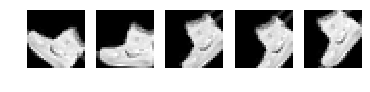

In [18]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [19]:
# Define model
    model2 = Sequential()


    # 1st Conv Layer
    model2.add(keras.layers.Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(keras.layers.Activation('relu'))

    # 2nd Conv Layer
    model2.add(keras.layers.Convolution2D(33, 3, 3))
    model2.add(keras.layers.Activation('relu'))
    
    #Max pooling layer
    model2.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    
    #Dropout layer
    model2.add(keras.layers.Dropout(0.25))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(keras.layers.Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(keras.layers.Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit_generator(datagen.flow(x_train, y_train, batch_size=32),samples_per_epoch=x_train.shape[0], nb_epoch=10, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(33, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7793 - acc: 0.7119 - val_loss: 0.5460 - val_acc: 0.7980
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5744 - acc: 0.7843 - val_loss: 0.4704 - val_acc: 0.8271
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5094 - acc: 0.8090 - val_loss: 0.4354 - val_acc: 0.8437
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4777 - acc: 0.8209 - val_loss: 0.4335 - val_acc: 0.8383
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4517 - acc: 0.8312 - val_loss: 0.4190 - val_acc: 0.8466
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4321 - acc: 0.8386 - val_loss: 0.4249 - val_acc: 0.8440
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4183 - acc: 0.8434 - val_loss: 0.4029 - val_acc: 0.8522
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [21]:
print(model2.evaluate(x_test,y_test))

10000/10000 [==============================] - 1s 53us/step
[0.36401661043167116, 0.8666]


In [22]:
print(model2.evaluate(x_train,y_train))

60000/60000 [==============================] - 3s 54us/step
[0.3376097192466259, 0.8740666666666667]
